<a href="https://colab.research.google.com/github/AlanGranea/Challenge-Telecom-X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracción

## Importando el archivo JSON

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('TelecomX_Data.json')

## Primer vistazo al DataFrame

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#Transformación

## Conociendo el conjunto de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


## Normalización de las columnas

In [ ]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_normalizado = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [ ]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(df_normalizado.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


## Comprobación de datos nulos, duplicados, únicos y valores nulos en los textos

In [ ]:
valores_nulos = df_normalizado.isnull().sum()
print(f"Valores nulos exactos:\n{valores_nulos}")

Valores nulos exactos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
duplicados = df_normalizado.duplicated().sum()
print(f"Las filas duplicadas exactas son {duplicados}")

Las filas duplicadas exactas son 0


In [ ]:
duplicados_id = df_normalizado['customerID'].duplicated().sum()
print(f"Duplicados en 'id': {duplicados_id}")

Duplicados en 'id': 0


In [ ]:
for col in df_normalizado.columns:
    print(f"\nValores únicos en columna '{col}':")
    print(df_normalizado[col].unique())


Valores únicos en columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en columna 'Churn':
['No' 'Yes' '']

Valores únicos en columna 'gender':
['Female' 'Male']

Valores únicos en columna 'SeniorCitizen':
[0 1]

Valores únicos en columna 'Partner':
['Yes' 'No']

Valores únicos en columna 'Dependents':
['Yes' 'No']

Valores únicos en columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en columna 'PhoneService':
['Yes' 'No']

Valores únicos en columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en columna 'OnlineBackup':
['Yes' 'No' 'No interne

In [ ]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0])

Valores o strings vacíos por columna:
Churn            224
Charges.Total     11
dtype: int64


In [ ]:
# No hay valores nulos ni valores duplicados, pero si hay valores vacíos e inconsistencias en las categorías (columnas)

## Obtención de los índices donde hay valores nulos y manejo de datos inconsistentes

In [ ]:
df_normalizado.query("Churn == ''").index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [ ]:
df_normalizado.loc[df_normalizado["Churn"] == "", "Churn"] = "Yes"

In [ ]:
df_normalizado.query("Churn == ''").index

Index([], dtype='int64')

In [ ]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0])

Valores o strings vacíos por columna:
Charges.Total    11
dtype: int64


In [ ]:
ultima_columna = df_normalizado.columns[-1]
indices_vacios = df_normalizado[df_normalizado[ultima_columna].astype(str).str.strip() == ''].index
print(indices_vacios.tolist())

[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [ ]:
df_normalizado = df_normalizado.drop(indices_vacios)

In [ ]:
df_normalizado = df_normalizado.reset_index(drop=True)

In [ ]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0])

Valores o strings vacíos por columna:
Series([], dtype: int64)


In [ ]:
ultima_columna = df_normalizado.columns[-1]
indices_vacios = df_normalizado[df_normalizado[ultima_columna].astype(str).str.strip() == ''].index
print(indices_vacios.tolist())

[]


In [ ]:
df_normalizado

## Estandarización de los datos

In [ ]:
df_normalizado.columns = df_normalizado.columns.str.lower()

In [ ]:
df_normalizado

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_normalizado.rename(columns={
    'customerid': 'id_cliente',
    'gender': 'género',
    'seniorcitizen': 'cuidadano_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'meses_de_contrato',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'multiples_lineas_telefonicas',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_online',
    'onlinebackup': 'respaldo_online',
    'deviceprotection': 'proteccion_del_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'servicio_tv',
    'streamingmovies': 'servicio_de_peliculas',
    'contract': 'tipo_de_contrato',
    'paperlessbilling': 'factura_en_linea',
    'paymentmethod': 'forma_de_pago',
    'charges.monthly': 'cargos_mensuales',
    'charges.total': 'cargos_totales'
}, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Transformación de los tipos de datos de las columnas

In [ ]:
for col in df_normalizado.columns:
    print(f"\nValores únicos en columna '{col}':")
    print(df_normalizado[col].unique())


Valores únicos en columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en columna 'churn':
['No' 'Yes']

Valores únicos en columna 'género':
['Female' 'Male']

Valores únicos en columna 'cuidadano_mayor':
[0 1]

Valores únicos en columna 'pareja':
['Yes' 'No']

Valores únicos en columna 'dependientes':
['Yes' 'No']

Valores únicos en columna 'meses_de_contrato':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]

Valores únicos en columna 'servicio_telefonico':
['Yes' 'No']

Valores únicos en columna 'multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en columna 'servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en columna 'seguridad_online':
['No' 'Yes' 'No internet service']

Valores únicos en columna 'respa

In [ ]:
columnas_booleanas = ['churn', 'pareja', 'dependientes', 'servicio_telefonico', 'factura_en_linea']
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].replace({'Yes': True, 'No': False})
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].astype(bool)
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].astype(int)
df_normalizado

/tmp/ipython-input-32-3138680434.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].replace({'Yes': True, 'No': False})


,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [ ]:
print(df_normalizado.dtypes)

id_cliente                       object
churn                             int64
género                           object
cuidadano_mayor                   int64
pareja                            int64
dependientes                      int64
meses_de_contrato                 int64
servicio_telefonico               int64
multiples_lineas_telefonicas     object
servicio_internet                object
seguridad_online                 object
respaldo_online                  object
proteccion_del_dispositivo       object
soporte_tecnico                  object
servicio_tv                      object
servicio_de_peliculas            object
tipo_de_contrato                 object
factura_en_linea                  int64
forma_de_pago                    object
cargos_mensuales                float64
cargos_totales                   object
dtype: object


In [ ]:
columnas_textuales = ['id_cliente', 'género', 'multiples_lineas_telefonicas', 'servicio_internet', 'seguridad_online', 'respaldo_online', 'proteccion_del_dispositivo', 'soporte_tecnico', 'servicio_tv', 'servicio_de_peliculas', 'tipo_de_contrato', 'forma_de_pago']
df_normalizado[columnas_textuales] = df_normalizado[columnas_textuales].astype(str)
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [ ]:
print(df_normalizado.dtypes)

id_cliente                       object
churn                             int64
género                           object
cuidadano_mayor                   int64
pareja                            int64
dependientes                      int64
meses_de_contrato                 int64
servicio_telefonico               int64
multiples_lineas_telefonicas     object
servicio_internet                object
seguridad_online                 object
respaldo_online                  object
proteccion_del_dispositivo       object
soporte_tecnico                  object
servicio_tv                      object
servicio_de_peliculas            object
tipo_de_contrato                 object
factura_en_linea                  int64
forma_de_pago                    object
cargos_mensuales                float64
cargos_totales                   object
dtype: object


In [ ]:
df_normalizado['cargos_totales'] = df_normalizado['cargos_totales'].astype(float)
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [ ]:
print(df_normalizado.dtypes)

id_cliente                       object
churn                             int64
género                           object
cuidadano_mayor                   int64
pareja                            int64
dependientes                      int64
meses_de_contrato                 int64
servicio_telefonico               int64
multiples_lineas_telefonicas     object
servicio_internet                object
seguridad_online                 object
respaldo_online                  object
proteccion_del_dispositivo       object
soporte_tecnico                  object
servicio_tv                      object
servicio_de_peliculas            object
tipo_de_contrato                 object
factura_en_linea                  int64
forma_de_pago                    object
cargos_mensuales                float64
cargos_totales                  float64
dtype: object


### Ejemplos de comprobación

In [ ]:
print(df_normalizado['id_cliente'].apply(type).unique())

In [ ]:
print(df_normalizado['churn'].apply(type).unique())

In [ ]:
print(df_normalizado['cargos_totales'].apply(type).unique())

## Traducción de los valores para una mejor lectura

In [ ]:
for col in df_normalizado.columns:
    print(f"\nValores únicos en columna '{col}':")
    print(df_normalizado[col].unique())


Valores únicos en columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en columna 'churn':
[0 1]

Valores únicos en columna 'género':
['Female' 'Male']

Valores únicos en columna 'cuidadano_mayor':
[0 1]

Valores únicos en columna 'pareja':
[1 0]

Valores únicos en columna 'dependientes':
[1 0]

Valores únicos en columna 'meses_de_contrato':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]

Valores únicos en columna 'servicio_telefonico':
[1 0]

Valores únicos en columna 'multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en columna 'servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en columna 'seguridad_online':
['No' 'Yes' 'No internet service']

Valores únicos en columna 'respaldo_online':
['Yes' 'No' 'No

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7256 non-null   object 
 1   churn                         7256 non-null   int64  
 2   género                        7256 non-null   object 
 3   cuidadano_mayor               7256 non-null   int64  
 4   pareja                        7256 non-null   int64  
 5   dependientes                  7256 non-null   int64  
 6   meses_de_contrato             7256 non-null   int64  
 7   servicio_telefonico           7256 non-null   int64  
 8   multiples_lineas_telefonicas  7256 non-null   object 
 9   servicio_internet             7256 non-null   object 
 10  seguridad_online              7256 non-null   object 
 11  respaldo_online               7256 non-null   object 
 12  proteccion_del_dispositivo    7256 non-null   object 
 13  sop

In [ ]:
df_normalizado['género'] = df_normalizado['género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_normalizado['servicio_internet'] = df_normalizado['servicio_internet'].replace({'Fiber optic': 'Fibra óptica'})
df_normalizado['tipo_de_contrato'] = df_normalizado['tipo_de_contrato'].replace({'One year': 'Un año', 'Month-to-month': 'Mes a mes', 'Two year': 'Dos años'})
df_normalizado['forma_de_pago'] = df_normalizado['forma_de_pago'].replace({'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electrónico', 'Credit card (automatic)': 'Tarjeta de crédito', 'Bank transfer (automatic)': 'Transferencia bancaria'})

In [ ]:
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Femenino,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15,742.90
7252,9992-RRAMN,1,Masculino,0,1,0,22,1,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10,1873.70
7253,9992-UJOEL,0,Masculino,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30,92.75
7254,9993-LHIEB,0,Masculino,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65


## Creación de una nueva columna

In [ ]:
df_normalizado['cuentas_diarias'] = (df_normalizado['cargos_mensuales'] / 30.44)
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60,593.30,2.155059
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90,542.40,1.967806
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90,280.85,2.427727
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00,1237.85,3.219448
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Femenino,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15,742.90,1.811761
7252,9992-RRAMN,1,Masculino,0,1,0,22,1,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10,1873.70,2.795664
7253,9992-UJOEL,0,Masculino,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30,92.75,1.652431
7254,9993-LHIEB,0,Masculino,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65,2.228975


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7256 non-null   object 
 1   churn                         7256 non-null   int64  
 2   género                        7256 non-null   object 
 3   cuidadano_mayor               7256 non-null   int64  
 4   pareja                        7256 non-null   int64  
 5   dependientes                  7256 non-null   int64  
 6   meses_de_contrato             7256 non-null   int64  
 7   servicio_telefonico           7256 non-null   int64  
 8   multiples_lineas_telefonicas  7256 non-null   object 
 9   servicio_internet             7256 non-null   object 
 10  seguridad_online              7256 non-null   object 
 11  respaldo_online               7256 non-null   object 
 12  proteccion_del_dispositivo    7256 non-null   object 
 13  sop

#Carga y análisis

## Análisis descriptivo de los datos

In [ ]:
df_normalizado.describe()

,churn,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.288451,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.127314
std,0.453073,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,0.989676
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.164586
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.309461
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.953351
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


In [ ]:
columnas_categoricas = df_normalizado.select_dtypes(include=['object', 'category']).columns
df_normalizado[columnas_categoricas].describe()

,id_cliente,género,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,forma_de_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Masculino,No,Fibra óptica,No,No,No,No,No,No,Mes a mes,Cheque electrónico
freq,1,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


In [ ]:
columnas_numericas = df_normalizado.select_dtypes(include=['number']).columns
df_normalizado[columnas_numericas].describe()

,churn,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.288451,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.127314
std,0.453073,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,0.989676
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.164586
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.309461
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.953351
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


In [ ]:
"""
La mayoría de los clientes no se dieron de baja, pero hay un 28.8% que sí, lo cual es importante para analizar qué los lleva a irse.
El 16.29% son adultos mayores. El 48,36% tiene pareja y el 29.9% tiene dependientes.
El 90% usa servicio telefónico y el uso de factura en línea está en crecimiento, el 59% lo prefiere.
En la columna 'meses_de_contrato', la mediana es menor que la media, lo que sugiere que los clientes que han estado mucho tiempo “empujan” el promedio hacia arriba. Además, el 25% de los clientes ha estado menos de
9 meses, el 50% ha estado menos de 29 meses y el 75% ha estado menos de 55 meses. Con una desviación estándar tan alta del 24.55%, los contratos tienen duraciones muy diversas.
Los cargos mensuales y totales son variables con alta dispersión, lo que sugiere distintos planes o niveles de uso.

En promedio, un cliente paga unos 64.75 dolares por mes	y hay bastante variación entre lo que pagan distintos clientes mensualmente.
El 25% paga menos de 35.45 por mes. El 50% paga menos de 70.30 al mes y el 75% paga menos de 89.90 (Solo el 25% paga más que esto).
Con esto la distribución parece estar ligeramente sesgada a la izquierda, ya que la mediana está por encima de la media.

En promedio, un cliente ha pagado 2280.63 en total durante todo su contrato. Acá la desviación es altísima y la cantidad total pagada varía muchísimo entre clientes.
Un cuarto de los clientes ha pagado menos de 400. La mitad ha pagado menos de 1391 y el 75% ha pagado menos de 3785.30.
"""

"\nLa mayoría de los clientes no se dieron de baja, pero hay un 28.8% que sí, lo cual es importante para analizar qué los lleva a irse.\nEl 16.29% son adultos mayores. El 48,36% tiene pareja y el 29.9% tiene dependientes.\nEl 90% usa servicio telefónico y el uso de factura en línea está en crecimiento, el 59% lo prefiere.\nEn la columna 'meses_de_contrato', la mediana es menor que la media, lo que sugiere que los clientes que han estado mucho tiempo “empujan” el promedio hacia arriba. Además, el 25% de los clientes ha estado menos de\n9 meses podrían considerarse nuevos, el 50% ha estado menos de 29 meses y el 75% ha estado menos de 55 meses. Con una desviación estándar tan alta del 24.55%, los contratos tienen duraciones muy diversas.\nLos cargos mensuales y totales son variables con alta dispersión, lo que sugiere distintos planes o niveles de uso.\n\nEn promedio, un cliente paga unos 64.76 unidades monetarias por mes\ty hay bastante variación entre lo que pagan distintos clientes me

## Gráfico de la distribución de la evasión

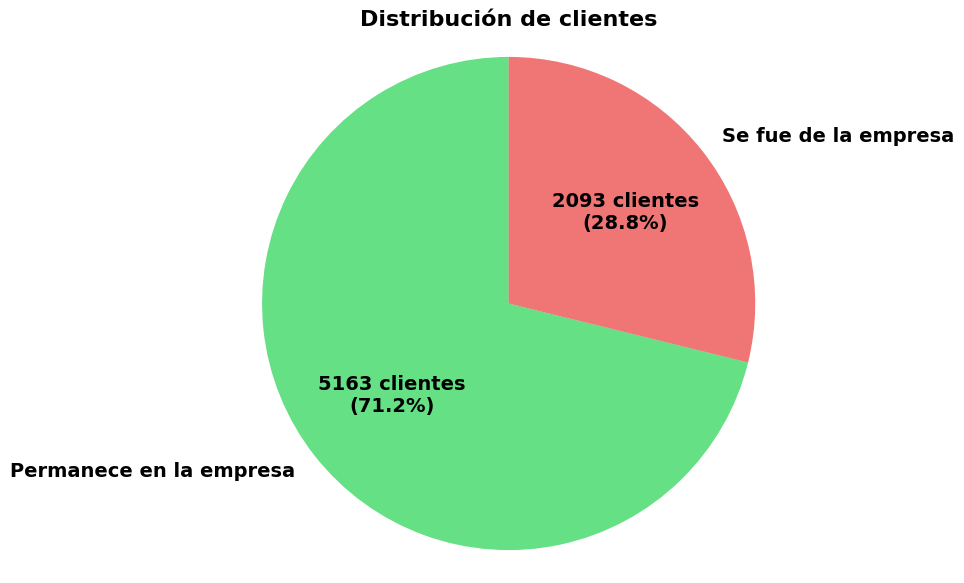

In [ ]:
import matplotlib.pyplot as plt

labels_map = {0: 'Permanece en la empresa', 1: 'Se fue de la empresa'}
churn_mapeado = df_normalizado['churn'].map(labels_map)
conteo = churn_mapeado.value_counts()

colores = [
    (0.0, 0.8, 0.2, 0.6),
    (0.9, 0.1, 0.1, 0.6)
]

plt.figure(figsize=(7, 7))
plt.pie(
    conteo,
    labels=conteo.index,
    colors=colores,
    startangle=90,
    autopct=lambda p: f'{int(round(p * sum(conteo) / 100))} clientes\n({p:.1f}%)',
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

plt.title('Distribución de clientes', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## Recuento de la evasión por variables categóricas

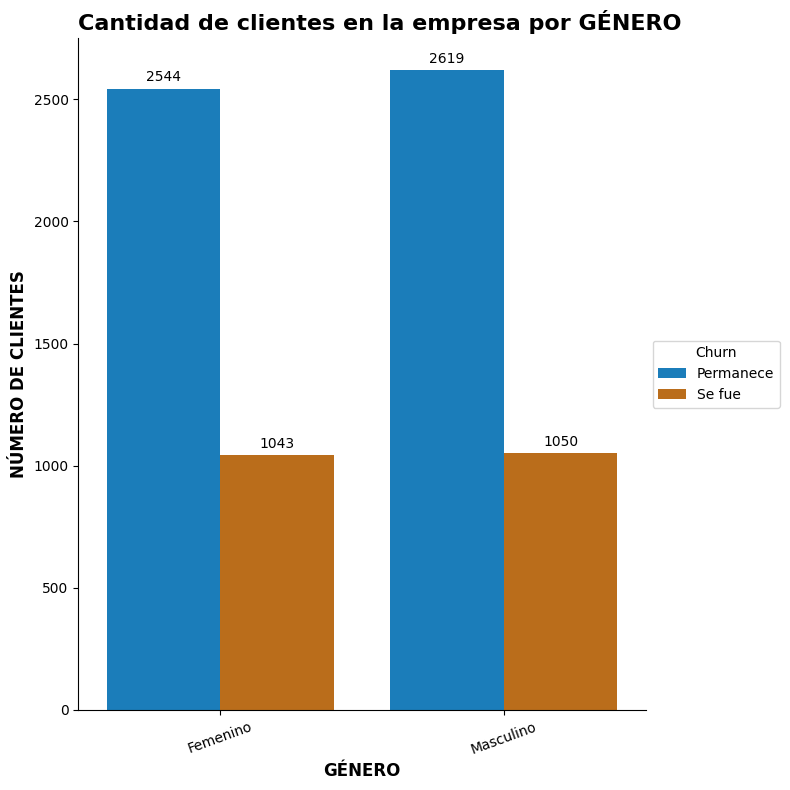

In [ ]:
import seaborn as sns

conteo_contrato = df_normalizado.groupby(['género', 'churn']).size().reset_index(name='Total')

palette = {
    'Permanece': '#0083d5',
    'Se fue': '#d56e00'
}

conteo_contrato['churn'] = conteo_contrato['churn'].map({0: 'Permanece', 1: 'Se fue'})

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine()

sns.barplot(
    data=conteo_contrato,
    x='género',
    y='Total',
    hue='churn',
    palette=palette,
    ax=ax
)

ax.set_title('Cantidad de clientes en la empresa por GÉNERO', fontsize=16, loc='left', fontweight='bold')
ax.set_xlabel('GÉNERO', fontsize=12, fontweight='bold')
ax.set_ylabel('NÚMERO DE CLIENTES', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=20)
ax.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {'Permanece': '#00f0ff', 'Se fue': '#ff00c8'}

nombres_nuevos = {
    'multiples_lineas_telefonicas': 'MÚLTIPLES LÍNEAS TELEFÓNICAS',
    'servicio_internet': 'SERVICIO DE INTERNET',
    'seguridad_online': 'SEGURIDAD ONLINE',
    'respaldo_online': 'RESPALDO ONLINE',
    'proteccion_del_dispositivo': 'PROTECCIÓN DEL DISPOSITIVO',
    'soporte_tecnico': 'SOPORTE TÉCNICO',
    'servicio_tv': 'SERVICIO DE TV',
    'servicio_de_peliculas': 'SERVICIO DE PELÍCULAS',
    'tipo_de_contrato': 'TIPO DE CONTRATO',
    'forma_de_pago': 'FORMA DE PAGO'
}

def graficar_churn(df_normalizado, columnas):
    df_temp = df_normalizado.copy()
    df_temp['churn'] = df_temp['churn'].map({0: 'Permanece', 1: 'Se fue'})

    filas = (len(columnas) + 1) // 2
    fig, axes = plt.subplots(nrows=filas, ncols=2, figsize=(22, filas * 6))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        conteo = df_temp.groupby([col, 'churn']).size().reset_index(name='Total')
        conteo[col] = conteo[col].astype(str).str.upper()

        sns.barplot(
            data=conteo,
            x=col,
            y='Total',
            hue='churn',
            palette=palette,
            ax=axes[i]
        )

        nombre_columna = nombres_nuevos.get(col, col.upper())
        axes[i].set_title(f'CANTIDAD DE CLIENTES POR {nombre_columna}', fontsize=15, fontweight='bold', loc='left')
        axes[i].set_xlabel(nombre_columna, fontsize=12, fontweight = 'bold')
        axes[i].set_ylabel('NÚMERO DE CLIENTES', fontsize=12, fontweight = 'bold')
        axes[i].tick_params(axis='x', rotation=20)

        axes[i].legend(
            title='Churn',
            loc='center left',
            bbox_to_anchor=(1.05, 0.5),
            fontsize=10,
            title_fontsize=11
        )

        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%d', fontsize=9, padding=2)

        sns.despine(ax=axes[i])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.show()

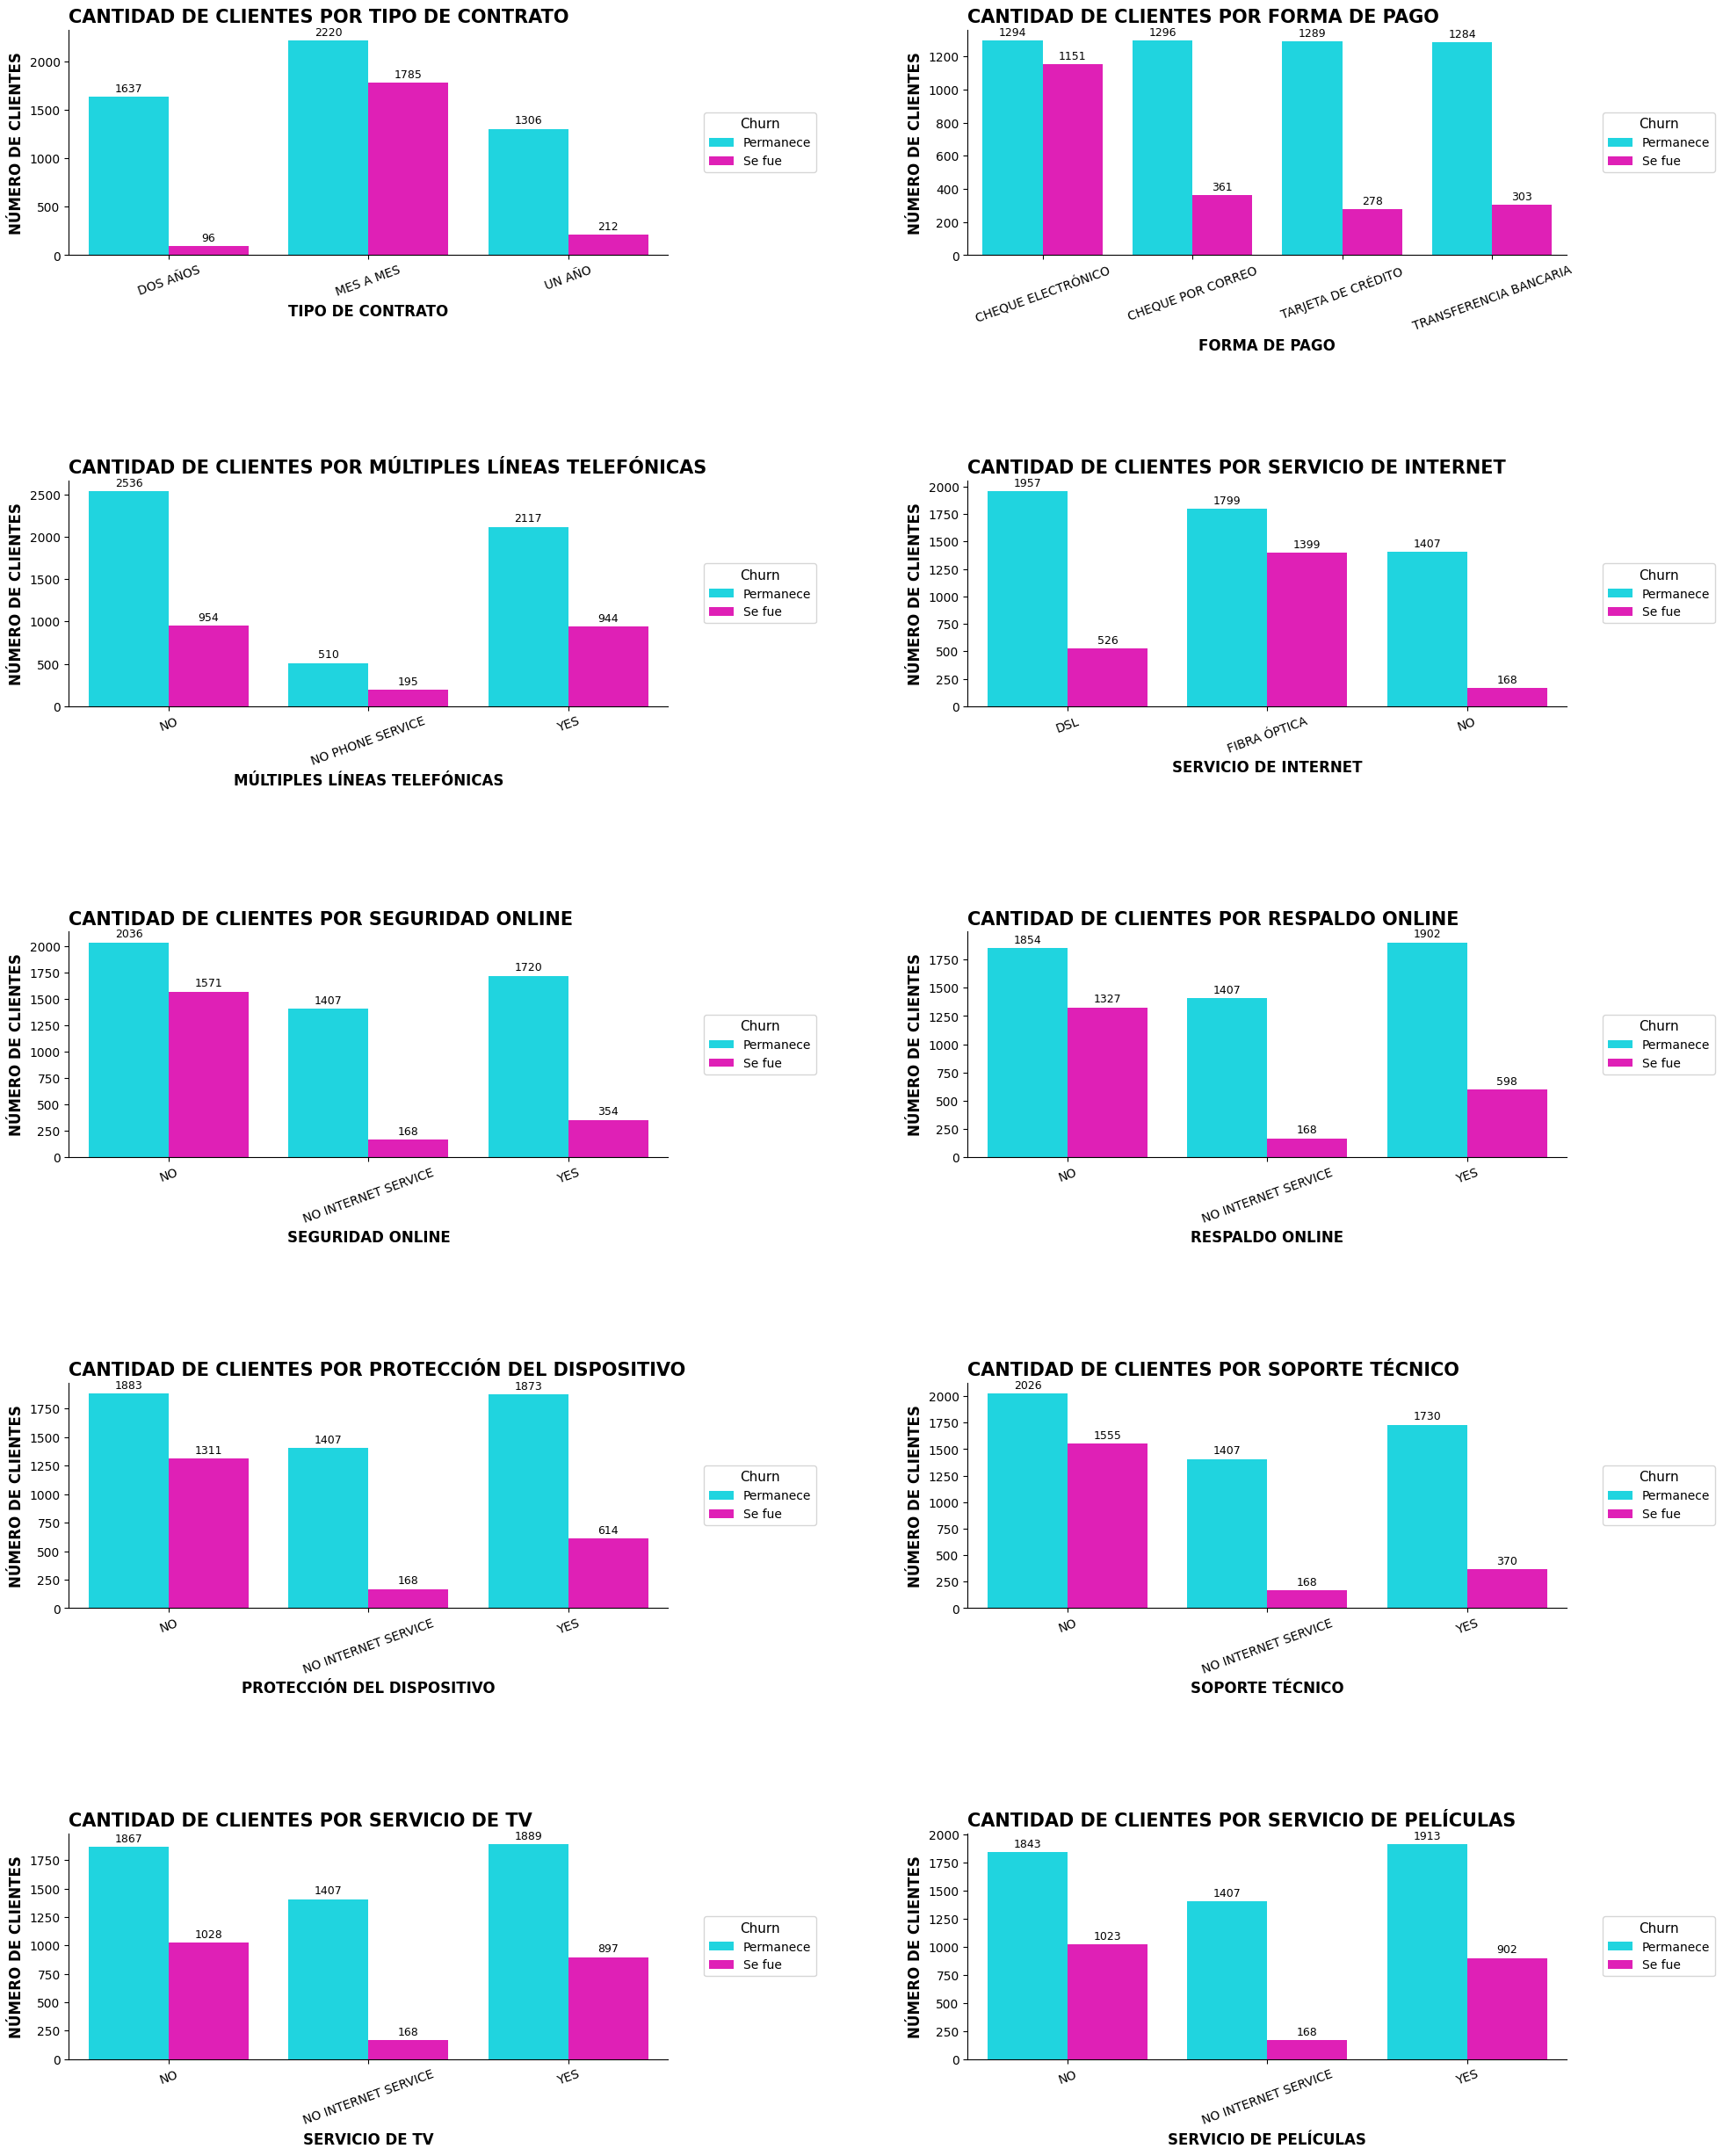

In [ ]:
columnas_categoricas = [
    'tipo_de_contrato',
    'forma_de_pago',
    'multiples_lineas_telefonicas',
    'servicio_internet',
    'seguridad_online',
    'respaldo_online',
    'proteccion_del_dispositivo',
    'soporte_tecnico',
    'servicio_tv',
    'servicio_de_peliculas',
]

graficar_churn(df_normalizado, columnas_categoricas)

In [ ]:
import matplotlib.pyplot as plt

def graficar_churn_valores_porcentuales(df_normalizado, columnas):
    df_temp = df_normalizado.copy()
    df_temp['churn'] = df_temp['churn'].map({0: 'PERMANECE', 1: 'SE FUE'})

    filas = (len(columnas) + 1) // 2
    fig, axes = plt.subplots(nrows=filas, ncols=2, figsize=(22, filas * 5))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        conteo = df_temp.groupby([col, 'churn']).size().reset_index(name='Total')
        conteo[col] = conteo[col].astype(str).str.upper()

        conteo['Porcentaje'] = conteo.groupby(col)['Total'].transform(lambda x: x / x.sum() * 100)

        pivot = conteo.pivot(index=col, columns='churn', values='Porcentaje').fillna(0)
        pivot = pivot[['PERMANECE', 'SE FUE']]

        ax = axes[i]

        width = 0.35
        posiciones = range(len(pivot))

        ax.barh(posiciones, pivot['PERMANECE'], height=width, label='PERMANECE', color='#00baff')
        ax.barh([p + width for p in posiciones], pivot['SE FUE'], height=width, label='SE FUE', color='#ff7f0e')

        ax.set_yticks([p + width / 2 for p in posiciones])
        ax.set_yticklabels(pivot.index)

        nombre_columna = nombres_nuevos.get(col, col.upper())
        ax.set_title(f'CANTIDAD DE CLIENTES POR {nombre_columna}', fontsize=15, fontweight='bold', loc='left')
        ax.set_xlabel('PORCENTAJE (%)', fontsize=12, fontweight='bold')
        ax.set_ylabel(nombre_columna, fontsize=12, fontweight='bold')
        ax.set_xlim(0, pivot.values.max() + 5)

        for j, valor in enumerate(pivot['PERMANECE']):
            if valor > 0:
                ax.text(valor + 0.3, j, f"{valor:.1f}%", va='center', fontsize=9)

        for j, valor in enumerate(pivot['SE FUE']):
            if valor > 0:
                ax.text(valor + 0.3, j + width, f"{valor:.1f}%", va='center', fontsize=9)

        sns.despine(ax=ax)
        ax.legend(
            title='Churn',
            bbox_to_anchor=(-0.25, 1.15),
            loc='upper left',
            borderaxespad=0.,
            frameon=False
            )

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.5, wspace=0.6)
    plt.show()

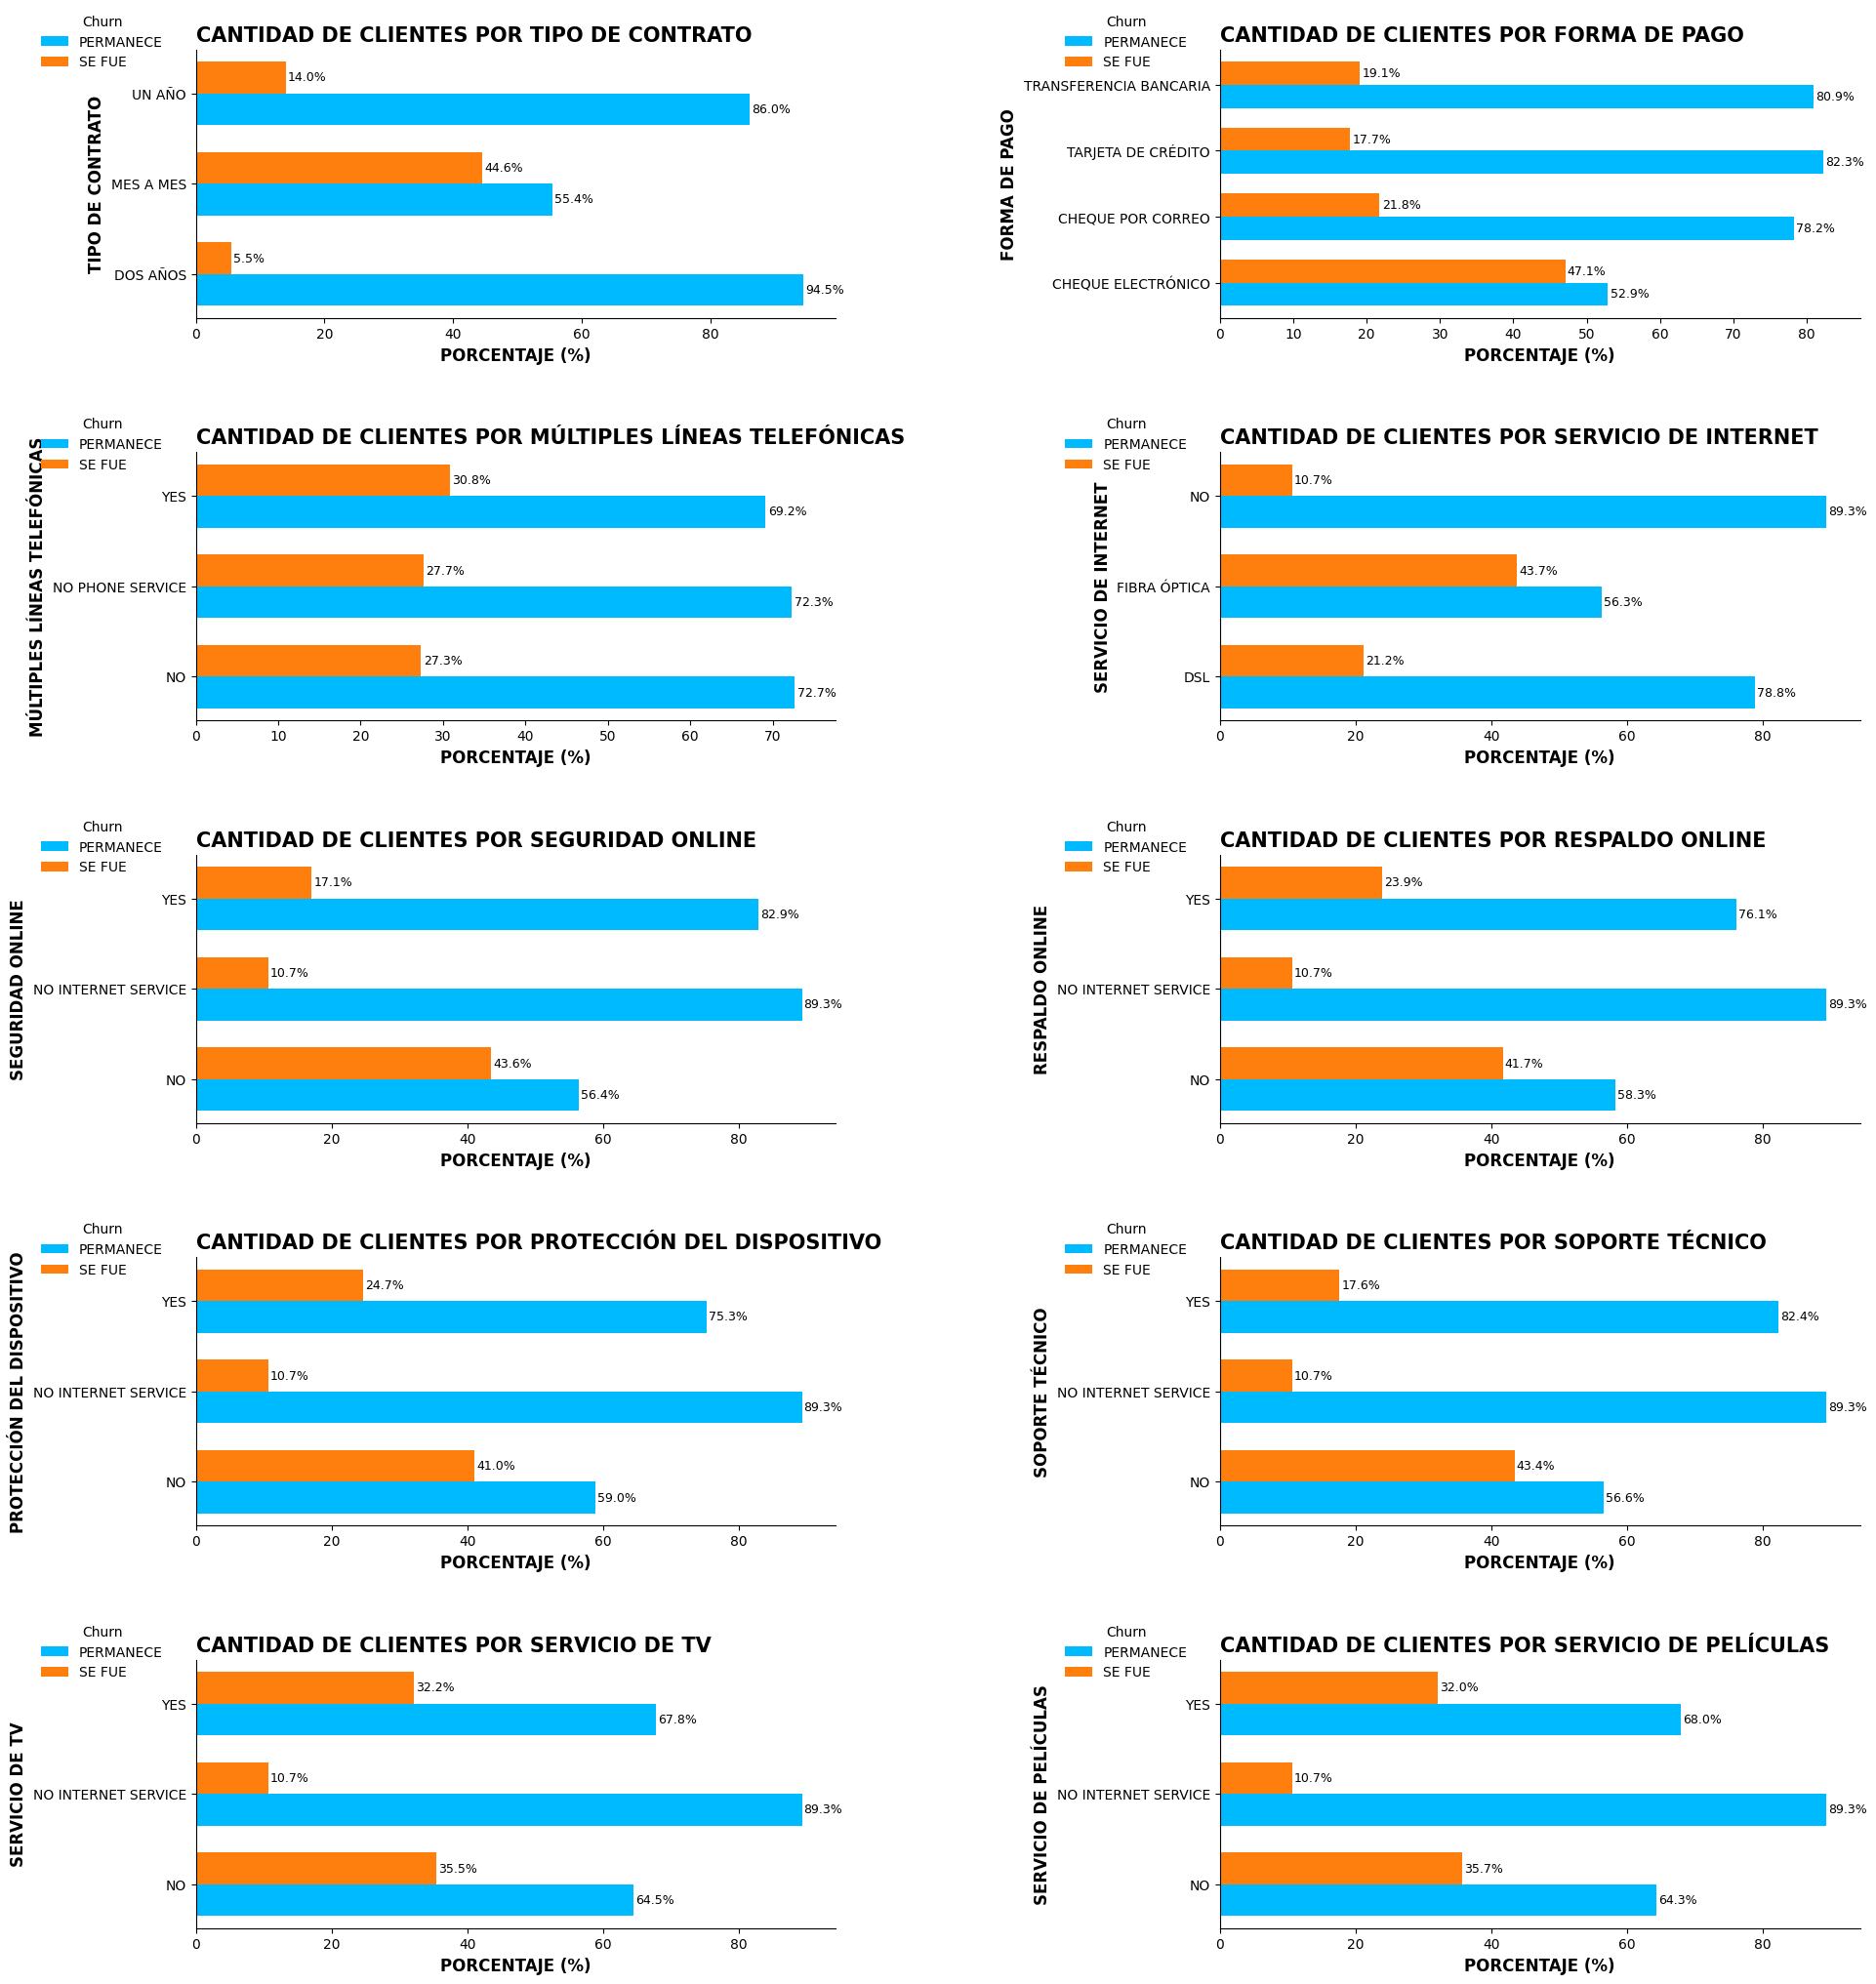

In [ ]:
columnas_categoricas = [
    'tipo_de_contrato',
    'forma_de_pago',
    'multiples_lineas_telefonicas',
    'servicio_internet',
    'seguridad_online',
    'respaldo_online',
    'proteccion_del_dispositivo',
    'soporte_tecnico',
    'servicio_tv',
    'servicio_de_peliculas',
]

graficar_churn_valores_porcentuales(df_normalizado, columnas_categoricas)

## Conteo de la evasión por variables numéricas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = {
    0: '#8A2BE2',
    1: '#FFD700'
}

colores_lineas = {
    'Mediana churn=0': '#000000',
    'Media churn=0': '#00FF00',
    'Mediana churn=1': '#FF0000',
    'Media churn=1': '#00FFFF'
}

nombres_ejes = {
    'meses_de_contrato': 'MESES DE CONTRATO',
    'cargos_mensuales': 'CARGOS MENSUALES',
    'cargos_totales': 'CARGOS TOTALES'
}

def graficar_distribucion_numericas(df_normalizado, columnas):
    df_temp = df_normalizado.copy()

    for col in columnas:
        nombre_legible = nombres_ejes.get(col, col.capitalize())

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))
        sns.despine()

        # BOXPLOT
        sns.boxplot(
            data=df_temp,
            x='churn',
            y=col,
            hue='churn',
            palette=palette,
            ax=axes[0],
            legend=False
        )

        mediana = df_temp.groupby('churn')[col].median()
        media = df_temp.groupby('churn')[col].mean()

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[0].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[0].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[0].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[0].set_title(f'BOXPLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[0].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[0].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # VIOLIN PLOT
        sns.violinplot(
            data=df_temp,
            x='churn',
            y=col,
            hue='churn',
            palette=palette,
            ax=axes[1],
            legend=False
        )

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[1].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[1].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[1].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[1].set_title(f'VIOLIN PLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[1].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[1].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # KDE
        for estado, label in zip([0, 1], ['Permanece', 'Se fue']):
            subset = df_temp[df_temp['churn'] == estado]
            sns.kdeplot(
                subset[col].astype(float),
                fill=True,
                label=label,
                ax=axes[2],
                color=palette[estado],
                alpha=0.8,
                linewidth=2
            )

        axes[2].set_title(f'DISTRIBUCIÓN KDE de {nombre_legible}', fontsize=13, fontweight='bold')
        axes[2].set_xlabel(nombre_legible, fontsize=10, fontweight='bold')
        axes[2].set_ylabel('DENSIDAD', fontsize=10, fontweight='bold')
        axes[2].legend(title='Churn')

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.show()

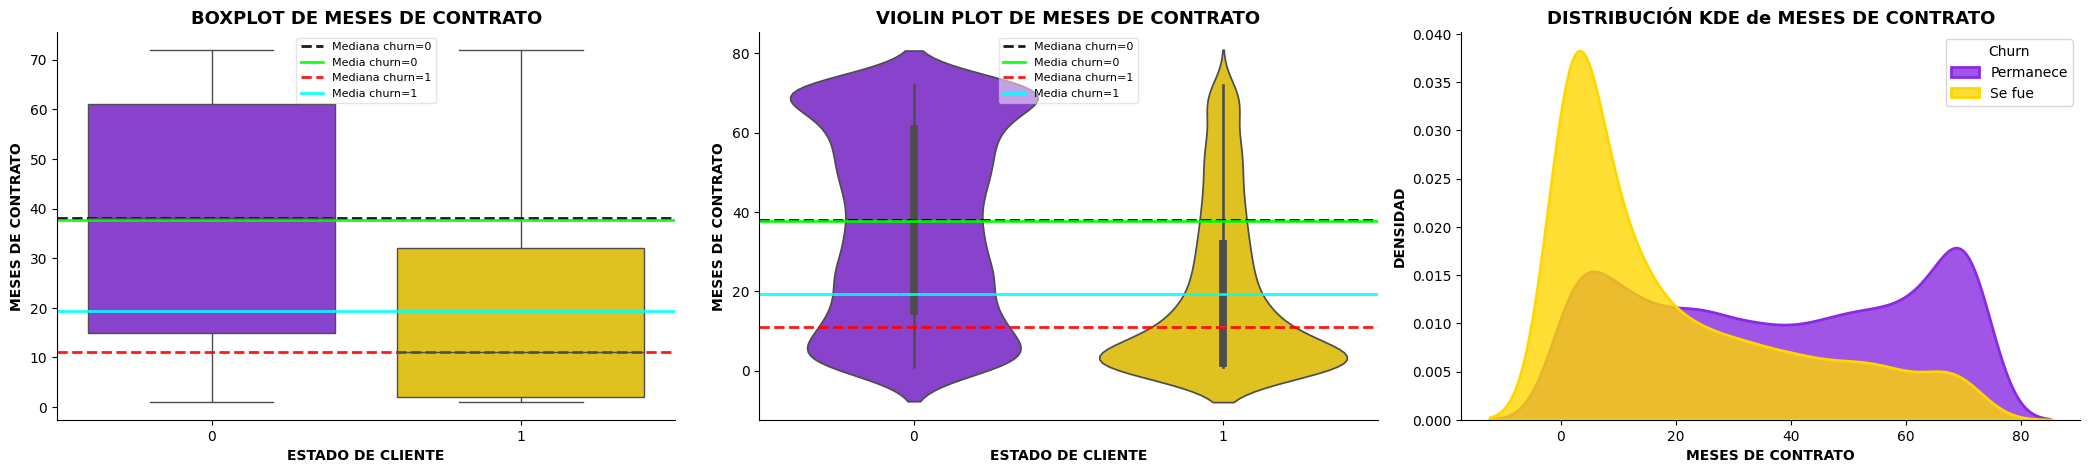

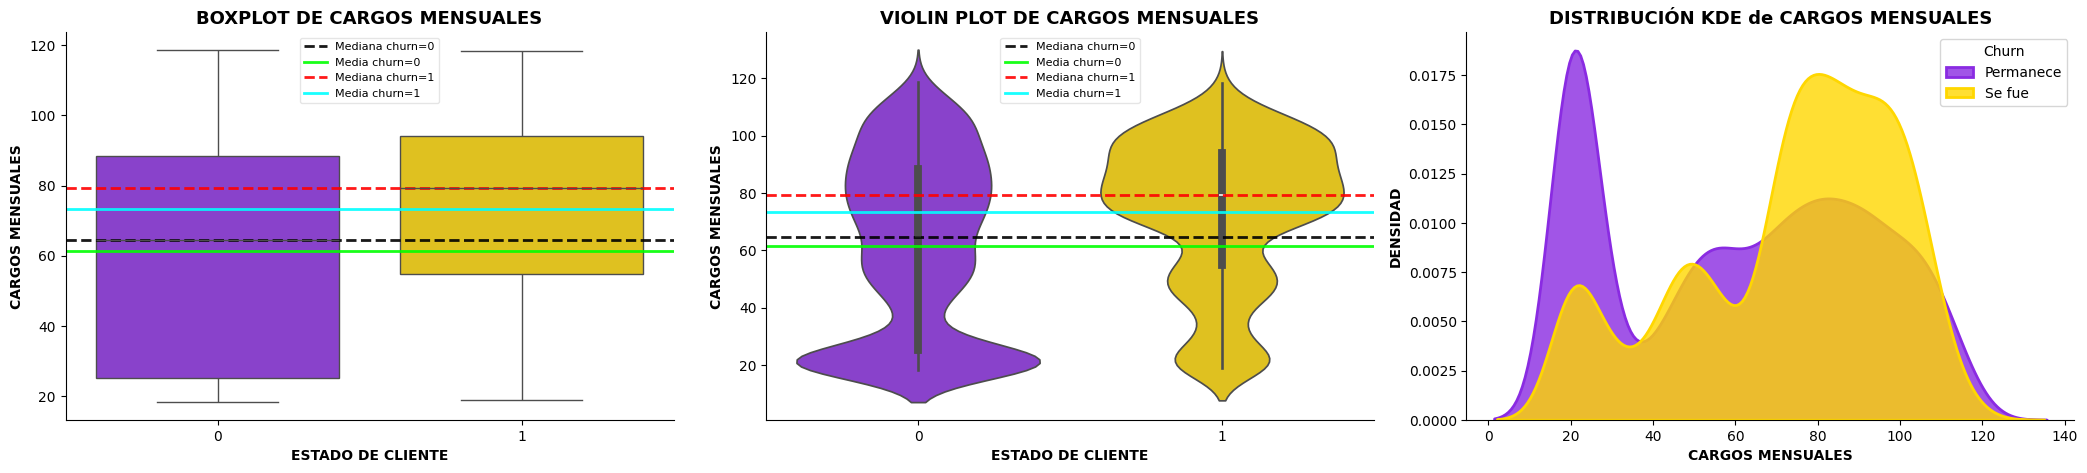

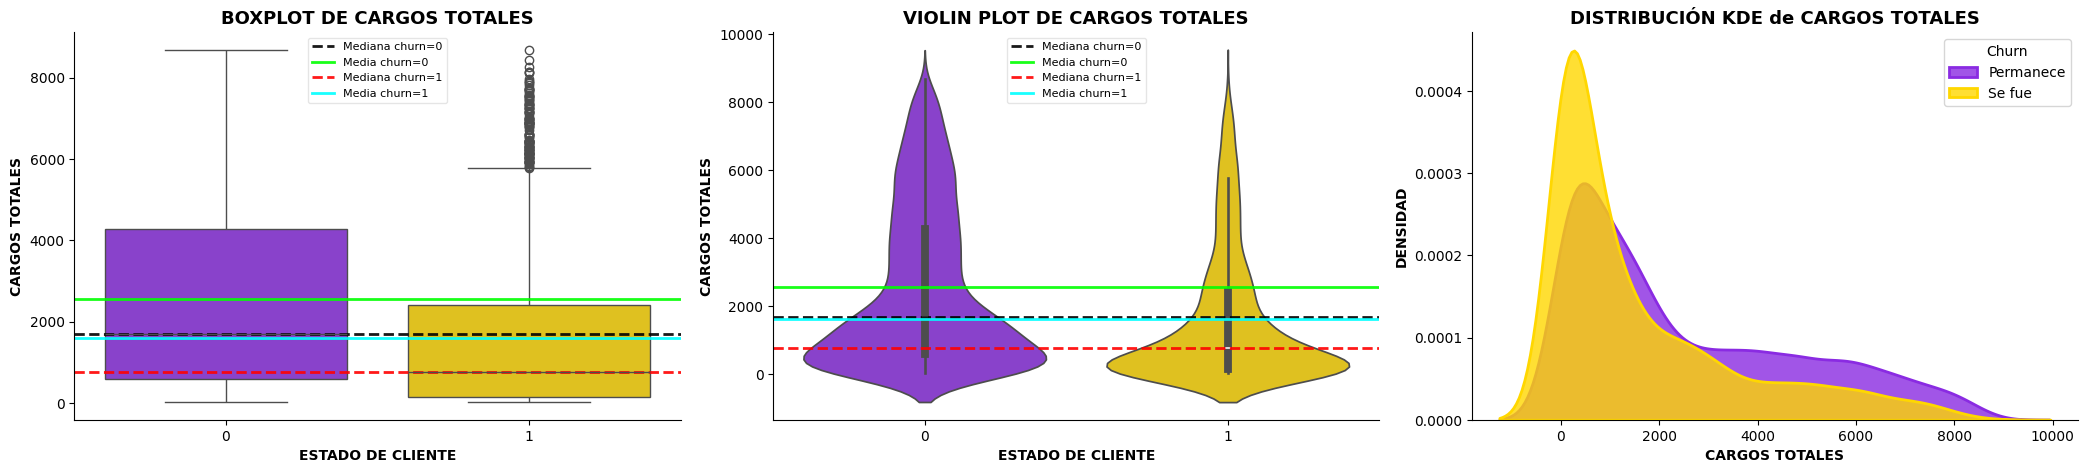

In [ ]:
columnas_numericas = ['meses_de_contrato', 'cargos_mensuales', 'cargos_totales']
graficar_distribucion_numericas(df_normalizado, columnas_numericas)

#Análisis de correlación

## Gráfico de la dispersión de clientes

In [ ]:
import plotly.express as px

fig = px.strip(
    df_normalizado,
    x="churn",
    y="cuentas_diarias",
    color="churn",
    color_discrete_map={0: '#0083d5', 1: '#d56e00'},
    title="RELACIÓN ENTRE LAS CUENTAS DIARAS Y EL ESTADO DEL CLIENTE",
    stripmode='overlay',
    labels={'churn': 'ESTADO DEL CLIENTE', 'cuentas_diarias': 'CUENTAS DIARIAS'}
)
fig.show()

## Gráfico de la relación entre la cantidad de servicios y el estado del cliente

In [ ]:
columnas_servicios = [
    'servicio_telefonico', 'multiples_lineas_telefonicas', 'servicio_internet', 'seguridad_online',
    'respaldo_online', 'proteccion_del_dispositivo', 'soporte_tecnico',
    'servicio_tv', 'servicio_de_peliculas'
]

servicios_binarios = df_normalizado[columnas_servicios].apply(lambda col: ((col == 'Yes') | (col == 'DSL') | (col == 'Fibra óptica') | (col == 1))).astype(int)

df_normalizado['cantidad_servicios'] = servicios_binarios.sum(axis=1)

fig = px.box(
    df_normalizado,
    x="churn",
    y="cantidad_servicios",
    color="churn",
    color_discrete_map={0: '#0083d5', 1: '#d56e00'},
    title="RELACIÓN ENTRE LA CANTIDAD DE SERVICIOS Y EL ESTADO DEL CLIENTE",
    labels={'churn': 'ESTADO DEL CLIENTE', 'cantidad_servicios': 'CANTIDAD DE SERVICIOS'}
)
fig.show()

## Realizando una matriz de correlación

In [ ]:
import plotly.express as px

columnas_numericas = [
    'meses_de_contrato',
    'cargos_totales',
    'cuentas_diarias',
    'churn'
]

correlaciones = df_normalizado[columnas_numericas].corr()
orden = correlaciones['churn'].abs().sort_values(ascending=False).index.tolist()
correlaciones_ordenadas = correlaciones.loc[orden, orden]

fig = px.imshow(
    correlaciones_ordenadas,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale="Aggrnyl",
    title="MATRIZ DE CORRELACIÓN",
)

fig.update_layout(margin=dict(l=40, r=40, t=40, b=40))
fig.show()

#Informe final

Informe Final

🔹 Introducción
Este informe presenta el análisis del proyecto de Telecom X, una empresa que enfrenta una elevada tasa de cancelaciones de clientes. El objetivo fue identificar los factores que influyen en la evasión, generar información para diseñar modelos predictivos y proponer estrategias que fortalezcan la retención.

El proyecto se desarrolló bajo un proceso ETL para garantizar datos limpios y estructurados. Posteriormente, mediante un Análisis Exploratorio de Datos (EDA) se detectaron patrones, correlaciones y señales de riesgo asociadas al abandono.

🔹 Limpieza y Tratamiento de Datos

Los datos fueron extraídos desde una API en formato JSON e importados con Pandas, obteniendo un DataFrame sin procesar.

Se aplicó tratamiento de valores nulos y duplicados:

Eliminadas 11 filas con valores faltantes irreparables.

Reemplazadas 224 filas con el valor “Yes” para mantener consistencia en el análisis.

Se renombraron columnas al español para facilitar la interpretación y la comunicación con equipos no técnicos.

Se ajustaron los tipos de datos:

int64 para valores numéricos enteros.

float64 para cálculos.

str para valores categóricos.

Se tradujeron valores de filas para mayor claridad.

Se generó una nueva columna con el cálculo del valor diario de cada cliente para una visión más detallada.

🔹 Análisis Exploratorio de Datos (EDA)

Se calcularon métricas descriptivas (media, mediana, desviación estándar).

Se emplearon gráficos (matplotlib, seaborn y Plotly) para identificar patrones.

Principales hallazgos gráficos:

Pie chart: la tasa de churn es 28.8%.

Gráficos de barras: la mayoría de clientes tiene contratos de corto plazo y solo contrata servicios básicos (teléfono e Internet).

Boxplot, Violinplot y KDE:

Los clientes que cancelan lo hacen principalmente en los primeros 12 meses.

Cargos mensuales elevados están asociados a mayor riesgo de abandono.

Matriz de correlación: la duración del contrato es el factor con mayor peso en la retención.

🔹 Hallazgos Clave

28.8% de clientes abandonaron la empresa.

La duración del contrato es el factor más determinante en la permanencia.

Cargos mensuales altos aumentan ligeramente la probabilidad de fuga.

Contratar más servicios incrementa ingresos, pero no garantiza permanencia.

La mayor parte de bajas ocurre en los primeros 12 meses.

🔹 Conclusiones

El número de servicios contratados no asegura la retención. Lo decisivo son el tipo de contrato y el costo mensual.

Existe una correlación negativa entre churn y meses de contrato: a mayor tiempo en la empresa, menor probabilidad de fuga.

Aunque los cargos mensuales altos elevan el riesgo de abandono, los cargos totales altos reflejan en su mayoría clientes fieles de larga duración.

La venta cruzada aumenta ingresos, pero su éxito depende de ofrecer packs atractivos y precios competitivos.

El valor de vida del cliente depende tanto del número de servicios como de la longevidad del contrato.

🔹 Recomendaciones

Programas de fidelización temprana: enfocar esfuerzos en los primeros 12 meses con programas de bienvenida, llamadas de seguimiento y encuestas de satisfacción.

Incentivar contratos largos: ofrecer descuentos o beneficios adicionales en planes de 1-2 años frente a los contratos mensuales.

Optimización de precios: diseñar packs de servicios más económicos para disminuir la percepción de costos elevados.

Mejorar experiencia digital: fortalecer canales de soporte en facturación electrónica y optimizar la calidad del servicio de Internet (especialmente fibra óptica).

Ofrecer incentivos personalizados: detectar clientes con alta probabilidad de fuga y darles bonificaciones por extender el contrato.

🔹 Final
Este análisis establece bases sólidas para implementar un sistema predictivo de abandono, mejorar estrategias de retención y optimizar la rentabilidad de Telecom X. La clave está en fomentar contratos de mayor duración, controlar la percepción de precios y reforzar la atención durante los primeros meses de relación con el cliente.